In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [3]:
df.sample(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
1985,OD1986,Sheeba,Snacks,Chocolates,Kanyakumari,6/15/2016,West,1743,0.34,331.17,Tamil Nadu
4322,OD4323,Akash,Bakery,Cakes,Coimbatore,7/26/2016,West,563,0.10,50.67,Tamil Nadu
2273,OD2274,Sharon,Food Grains,Organic Staples,Ooty,11/30/2016,South,1721,0.12,258.15,Tamil Nadu
9473,OD9474,Verma,Fruits & Veggies,Fresh Vegetables,Theni,08-12-2015,South,1679,0.15,251.85,Tamil Nadu
9903,OD9904,Hussain,Food Grains,Organic Staples,Dindigul,03-10-2018,East,942,0.15,329.70,Tamil Nadu


In [4]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [5]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

There is no null values

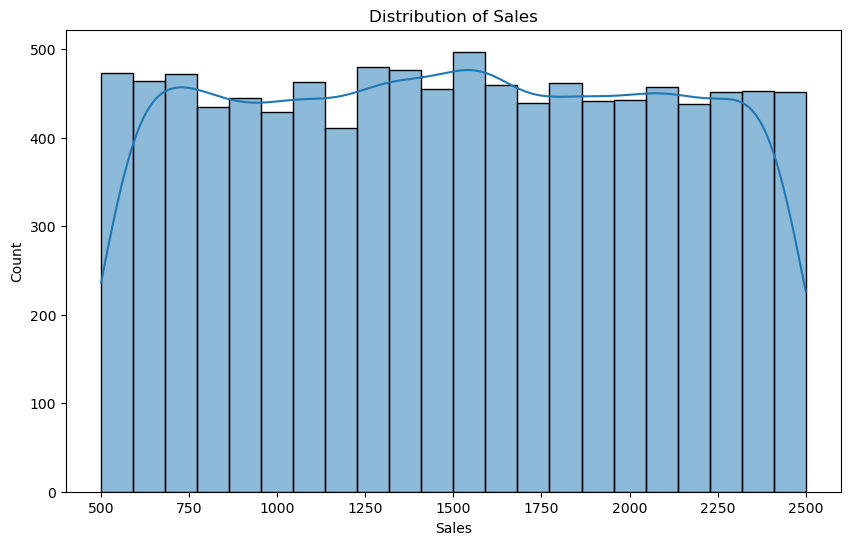

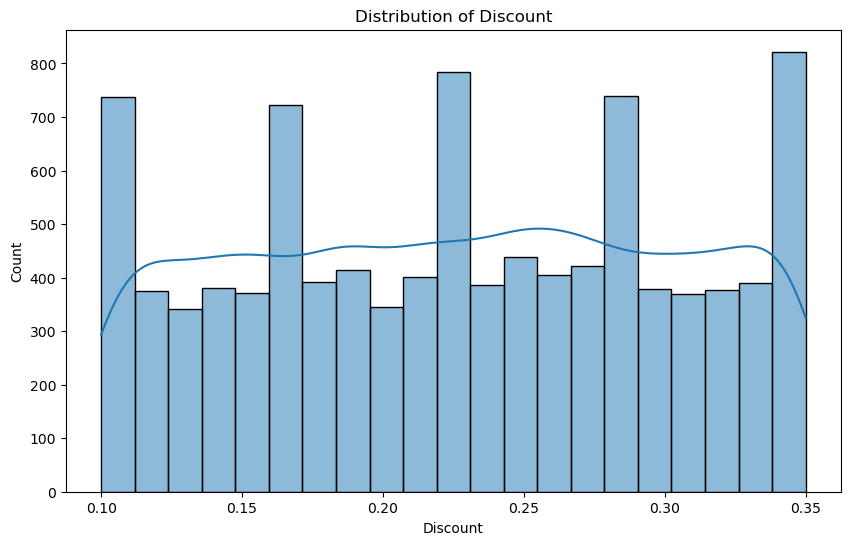

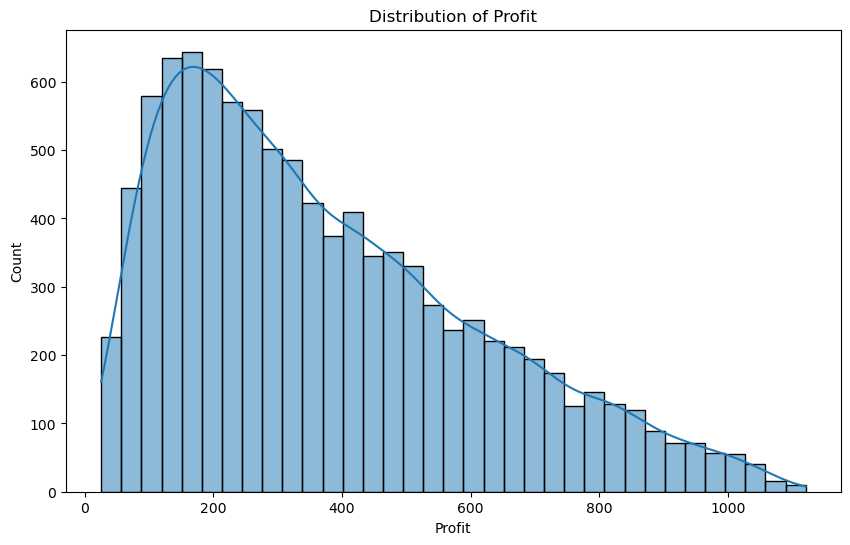

In [6]:
numerical_columns = ['Sales', 'Discount', 'Profit']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


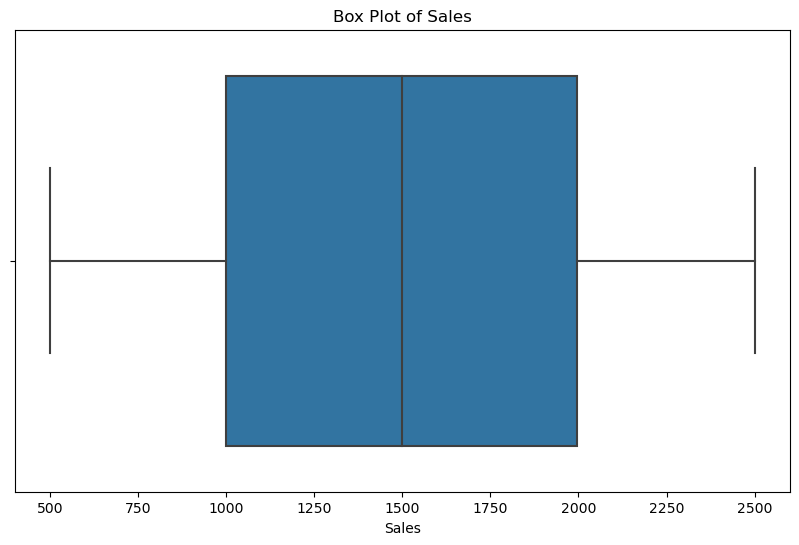

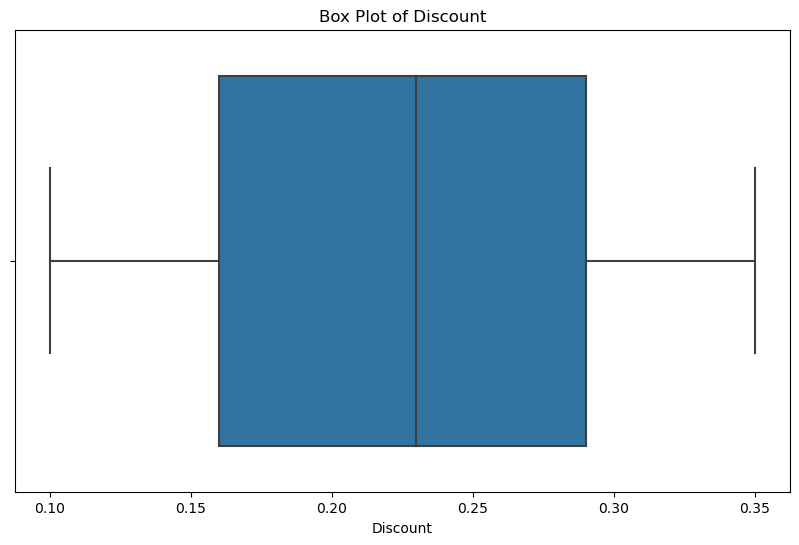

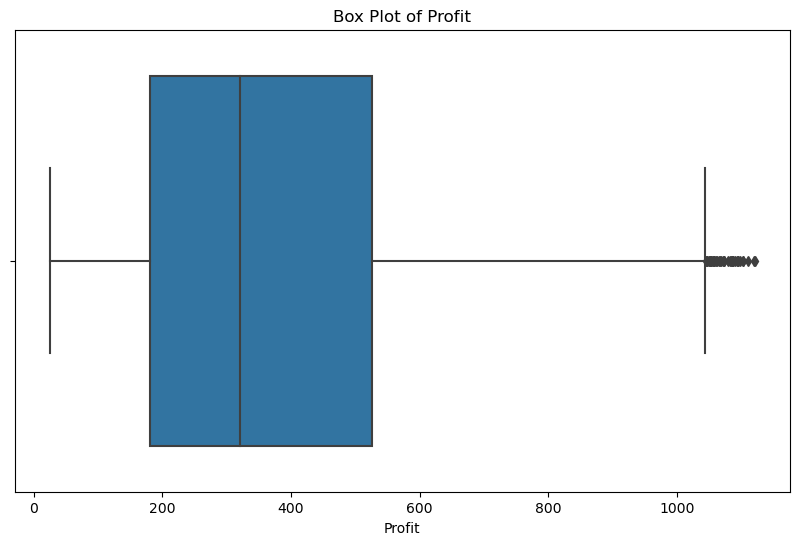

In [7]:
for feature in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


There are outliers in Profit column

In [10]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

In [11]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
# Filter out the outliers
df_new = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

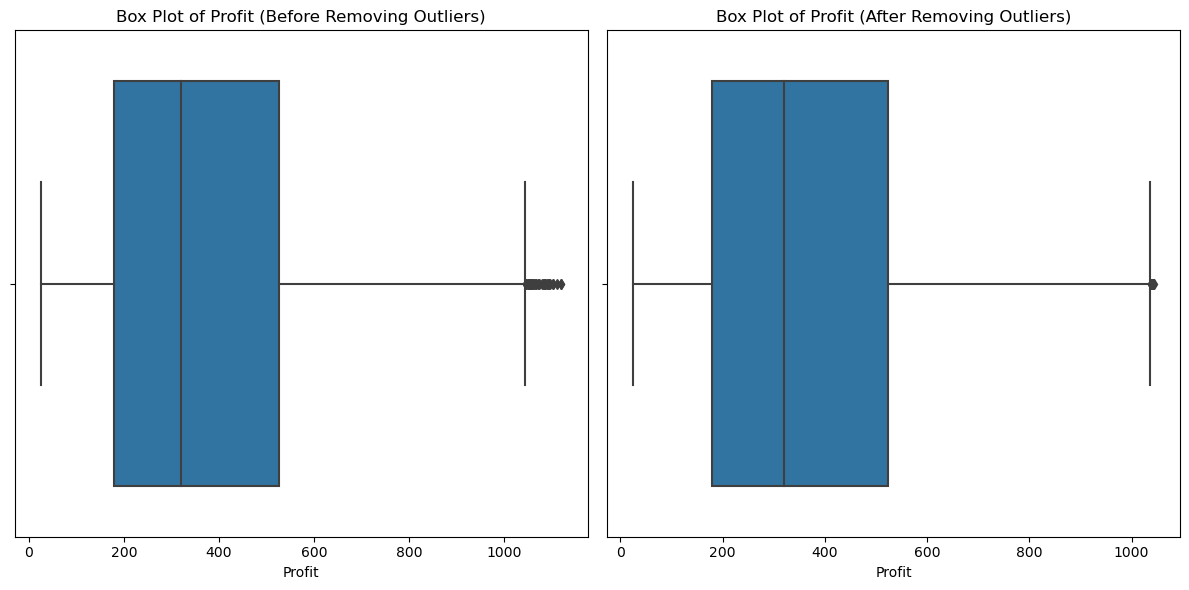

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Profit'])
plt.title('Box Plot of Profit (Before Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['Profit'])
plt.title('Box Plot of Profit (After Removing Outliers)')

plt.tight_layout()
plt.show()


In [15]:
num_outliers_removed = df.shape[0] - df_new.shape[0]
print(f'Number of outliers removed: {num_outliers_removed}')

Number of outliers removed: 43


C:\Users\HP_PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


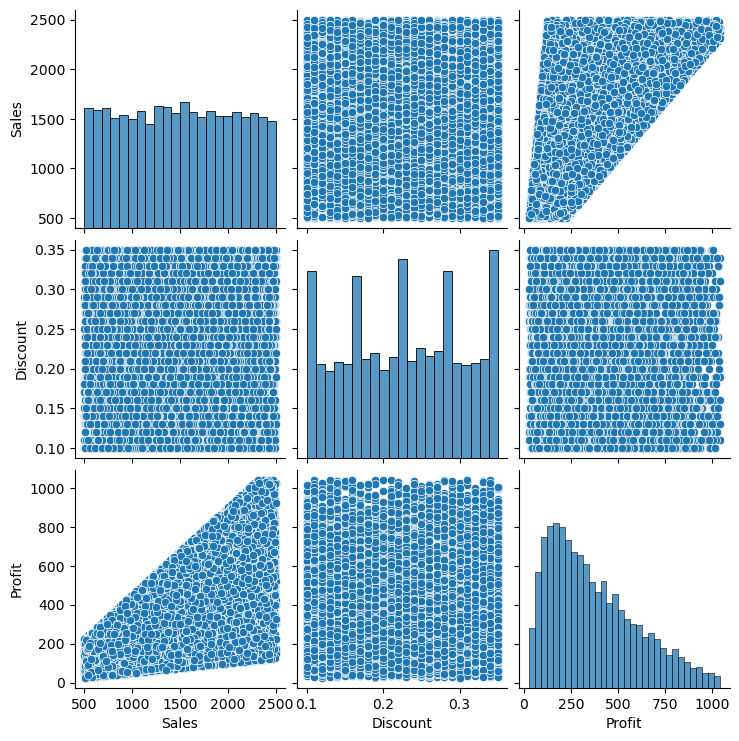

In [18]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df_new[numerical_columns])
plt.show()

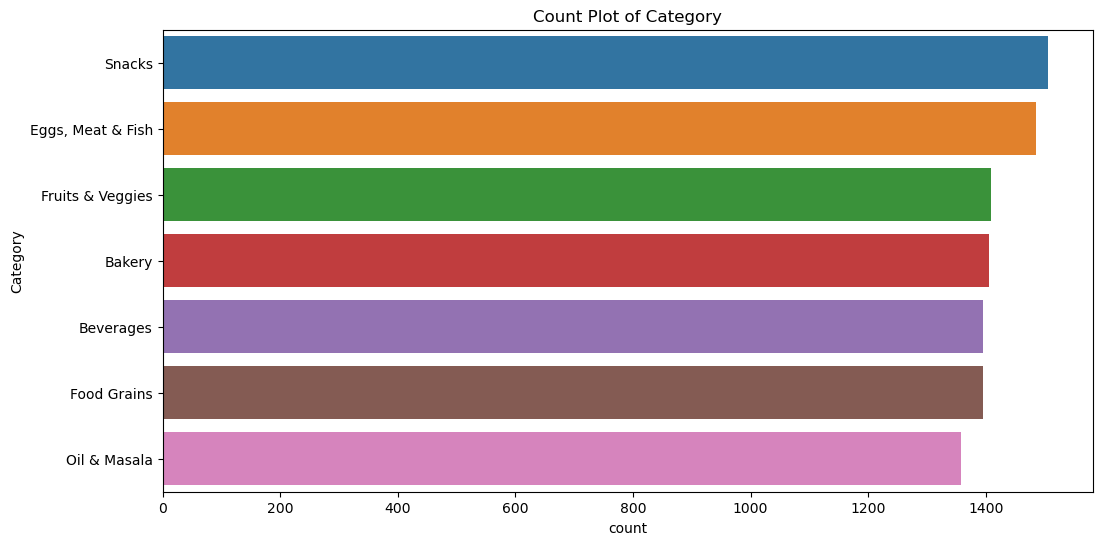

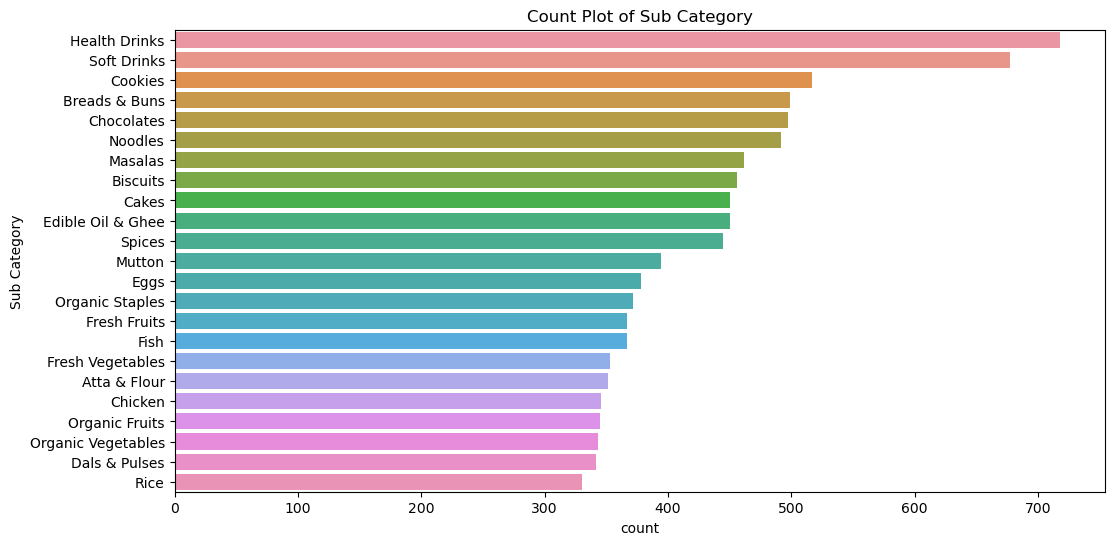

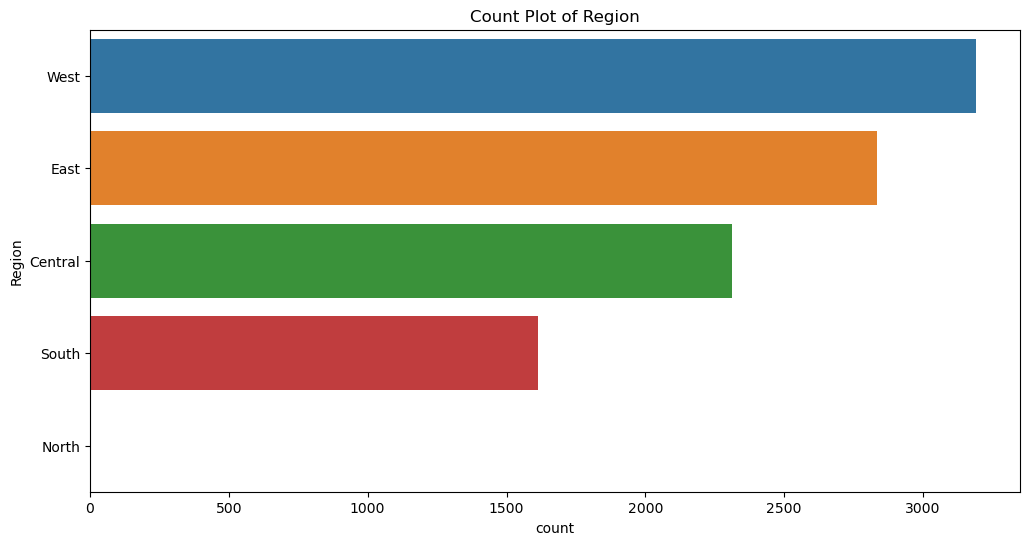

In [21]:
categorical_features = ['Category', 'Sub Category', 'Region']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df_new[feature], order=df_new[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()

In [64]:
for column in ['Category', 'Sub Category', 'City', 'Region', 'State']:
    df_new[column] = label_encoder.fit_transform(df_new[column])

C:\Users\HP_PC\AppData\Local\Temp\ipykernel_20548\3162955439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[column] = label_encoder.fit_transform(df_new[column])
C:\Users\HP_PC\AppData\Local\Temp\ipykernel_20548\3162955439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[column] = label_encoder.fit_transform(df_new[column])
C:\Users\HP_PC\AppData\Local\Temp\ipykernel_20548\3162955439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [65]:
df_new

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,5,14,21,11-08-2017,2,1254,0.12,401.28,0
1,OD2,Sudha,1,13,8,11-08-2017,3,749,0.18,149.80,0
2,OD3,Hussain,3,0,13,06-12-2017,4,2360,0.21,165.20,0
3,OD4,Jackson,4,12,4,10-11-2016,3,896,0.25,89.60,0
4,OD5,Ridhesh,3,18,12,10-11-2016,3,2355,0.26,918.45,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,2,9,9,12/24/2015,4,945,0.16,359.10,0
9990,OD9991,Alan,0,1,6,07-12-2015,4,1195,0.26,71.70,0
9991,OD9992,Ravi,3,20,0,06-06-2017,4,1567,0.16,501.44,0
9992,OD9993,Peer,5,22,14,10/16/2018,4,1659,0.15,597.24,0


In [66]:
X=df_new[['Category', 'Sub Category', 'City', 'Region', 'Sales', 'Discount', 'Profit']]

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [95]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [96]:
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow

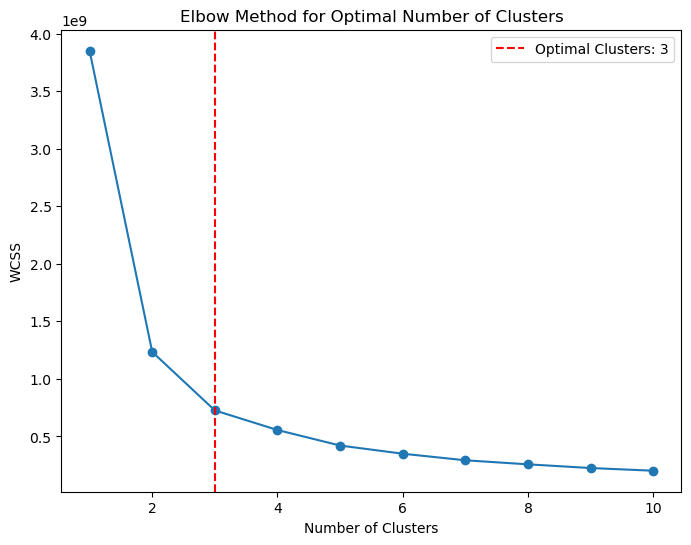

In [97]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.axvline(optimal_clusters, linestyle='--', color='r', label=f'Optimal Clusters: {optimal_clusters}')
plt.legend()
plt.show()

In [98]:
n=optimal_clusters

In [99]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)
labels = kmeans.labels_

In [100]:
from sklearn.metrics import silhouette_score

In [101]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5485465403684207


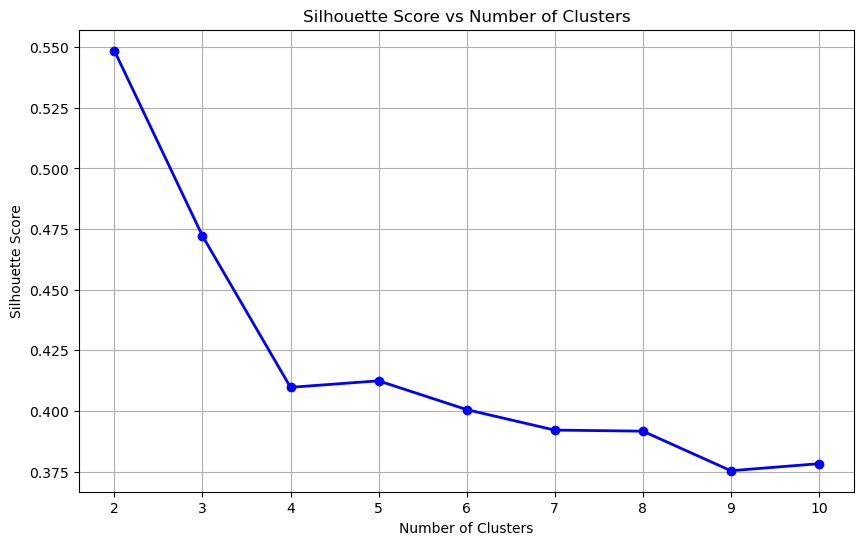

In [102]:
cluster_range = range(2, 11)  # Try clusters from 2 to 10

# Lists to store silhouette scores for each cluster
silhouette_scores = []
for n_clusters in cluster_range:
    # Initialize KMeans clustering with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
# Plotting the Silhouette Score vs number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [103]:
from sklearn.cluster import DBSCAN

In [110]:
# Initialize DBSCAN clustering
# Adjust eps (neighborhood radius) and min_samples based on your dataset characteristics
eps = 0.3  # Adjust as needed
min_samples = 3  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

DBSCAN(eps=0.3, min_samples=3)

In [111]:
# Extract cluster labels
labels_db = dbscan.labels_

In [112]:
unique_labels = set(labels)
if len(unique_labels) == 1:
    print("All points are assigned to one cluster (or labeled as noise). Adjust DBSCAN parameters.")
else:
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5485465403684207


In [114]:
from sklearn.metrics import davies_bouldin_score

C:\Users\HP_PC\AppData\Local\Temp\ipykernel_20548\3155849521.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(davies_bouldin_scores, interpolation='nearest', cmap=plt.cm.get_cmap('viridis'))


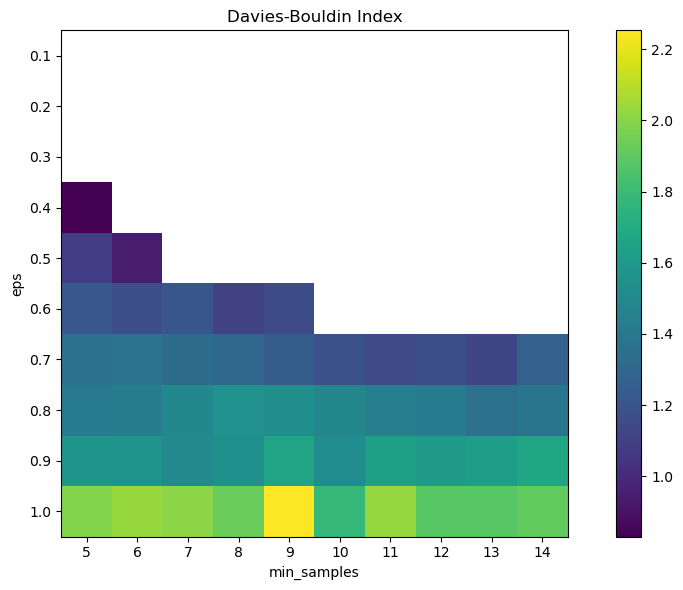

In [117]:
eps_range = np.linspace(0.1, 1.0, 10)
min_samples_range = range(5, 15)

# Initialize lists to store scores
davies_bouldin_scores = np.zeros((len(eps_range), len(min_samples_range)))

# Iterate over parameter ranges
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        # Initialize DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit DBSCAN clustering
        dbscan.fit(X_scaled)
        
        # Check if there are at least two clusters (excluding noise points)
        unique_labels = np.unique(dbscan.labels_)
        if len(unique_labels) > 1 or (-1 not in unique_labels):
            # Calculate Davies-Bouldin index if there are clusters
            davies_bouldin_scores[i, j] = davies_bouldin_score(X_scaled, dbscan.labels_)
        else:
            davies_bouldin_scores[i, j] = np.nan  # Set to NaN if no valid clusters

# Plotting Davies-Bouldin scores
plt.figure(figsize=(10, 6))
plt.imshow(davies_bouldin_scores, interpolation='nearest', cmap=plt.cm.get_cmap('viridis'))
plt.colorbar()
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Davies-Bouldin Index')
plt.xticks(np.arange(len(min_samples_range)), min_samples_range)
plt.yticks(np.arange(len(eps_range)), np.round(eps_range, 1))
plt.tight_layout()
plt.savefig('gg')
plt.show()

In [121]:
df_new['cluster'] = labels

C:\Users\HP_PC\AppData\Local\Temp\ipykernel_20548\2400997739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster'] = labels


In [124]:
df_new

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,cluster
0,OD1,Harish,5,14,21,11-08-2017,2,1254,0.12,401.28,0,0
1,OD2,Sudha,1,13,8,11-08-2017,3,749,0.18,149.80,0,0
2,OD3,Hussain,3,0,13,06-12-2017,4,2360,0.21,165.20,0,1
3,OD4,Jackson,4,12,4,10-11-2016,3,896,0.25,89.60,0,0
4,OD5,Ridhesh,3,18,12,10-11-2016,3,2355,0.26,918.45,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,2,9,9,12/24/2015,4,945,0.16,359.10,0,0
9990,OD9991,Alan,0,1,6,07-12-2015,4,1195,0.26,71.70,0,0
9991,OD9992,Ravi,3,20,0,06-06-2017,4,1567,0.16,501.44,0,1
9992,OD9993,Peer,5,22,14,10/16/2018,4,1659,0.15,597.24,0,1


In [125]:
columns_segment = ['Category', 'Sub Category', 'City', 'Region', 'Sales', 'Discount', 'Profit']

In [128]:
data_pivot1 = df_new[columns_segment + ['cluster']].groupby('cluster').mean()
cluster_counts = df_new['cluster'].value_counts()
total_count = len(df_new)
cluster_percentages = (cluster_counts / total_count) * 100

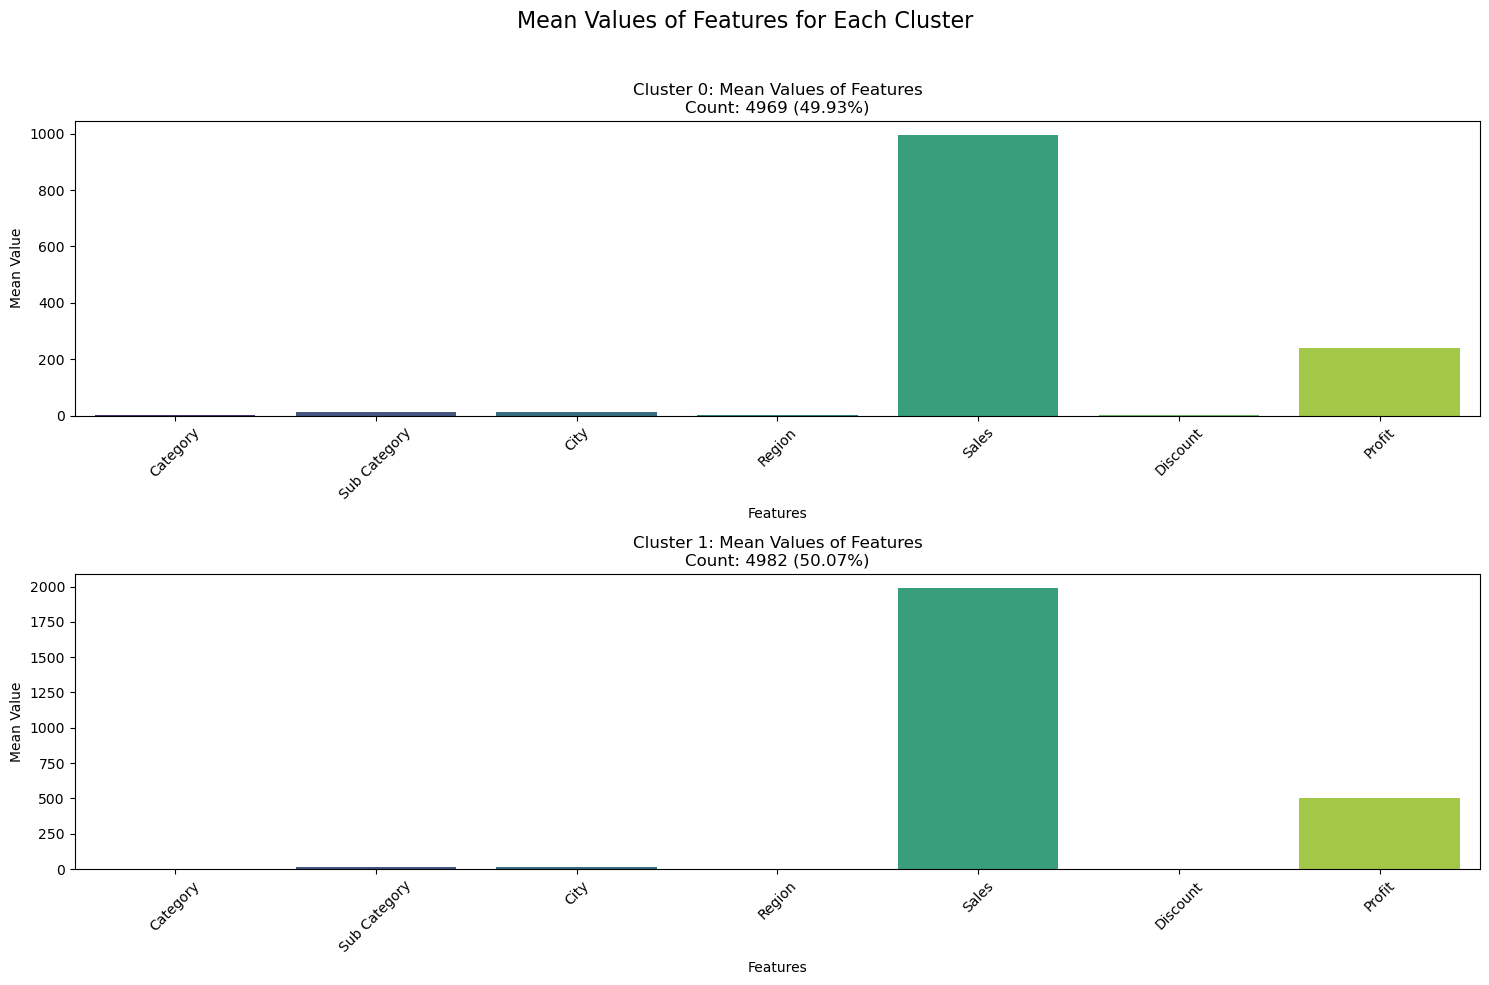

In [129]:
num_clusters = data_pivot1.shape[0]
plt.figure(figsize=(15, num_clusters * 5))

for i in range(num_clusters):
    plt.subplot(num_clusters, 1, i + 1)
    sns.barplot(x=data_pivot1.columns, y=data_pivot1.iloc[i], palette='viridis')
    count = cluster_counts[i]
    percentage = cluster_percentages[i]
    plt.title(f"Cluster {i}: Mean Values of Features\nCount: {count} ({percentage:.2f}%)")
    plt.xlabel("Features")
    plt.ylabel("Mean Value")
    plt.xticks(rotation=45)

plt.suptitle("Mean Values of Features for Each Cluster", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [131]:
city_cluster = pd.crosstab(index = df_new['cluster'], columns = df_new['City'])

In [132]:
city_cluster.T

cluster,0,1
City,,
0,205,236
1,223,208
2,219,205
3,202,213
4,180,195
5,202,193
6,218,240
7,209,219
8,238,201


In [134]:
Category_cluster = pd.crosstab(index = df_new['cluster'], columns = df_new['Category' ])

In [135]:
Category_cluster

Category,0,1,2,3,4,5,6
cluster,,,,,,,
0,701,688,712,670,738,681,779
1,704,707,773,725,670,676,727


<Figure size 1000x600 with 0 Axes>

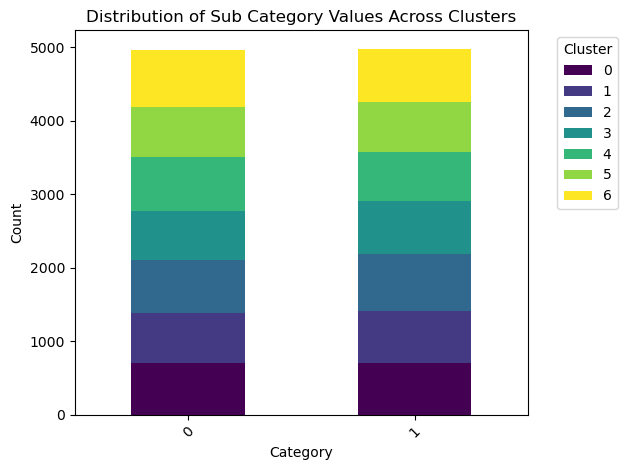

In [136]:
plt.figure(figsize=(10, 6))
Category_cluster.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Sub Category Values Across Clusters')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

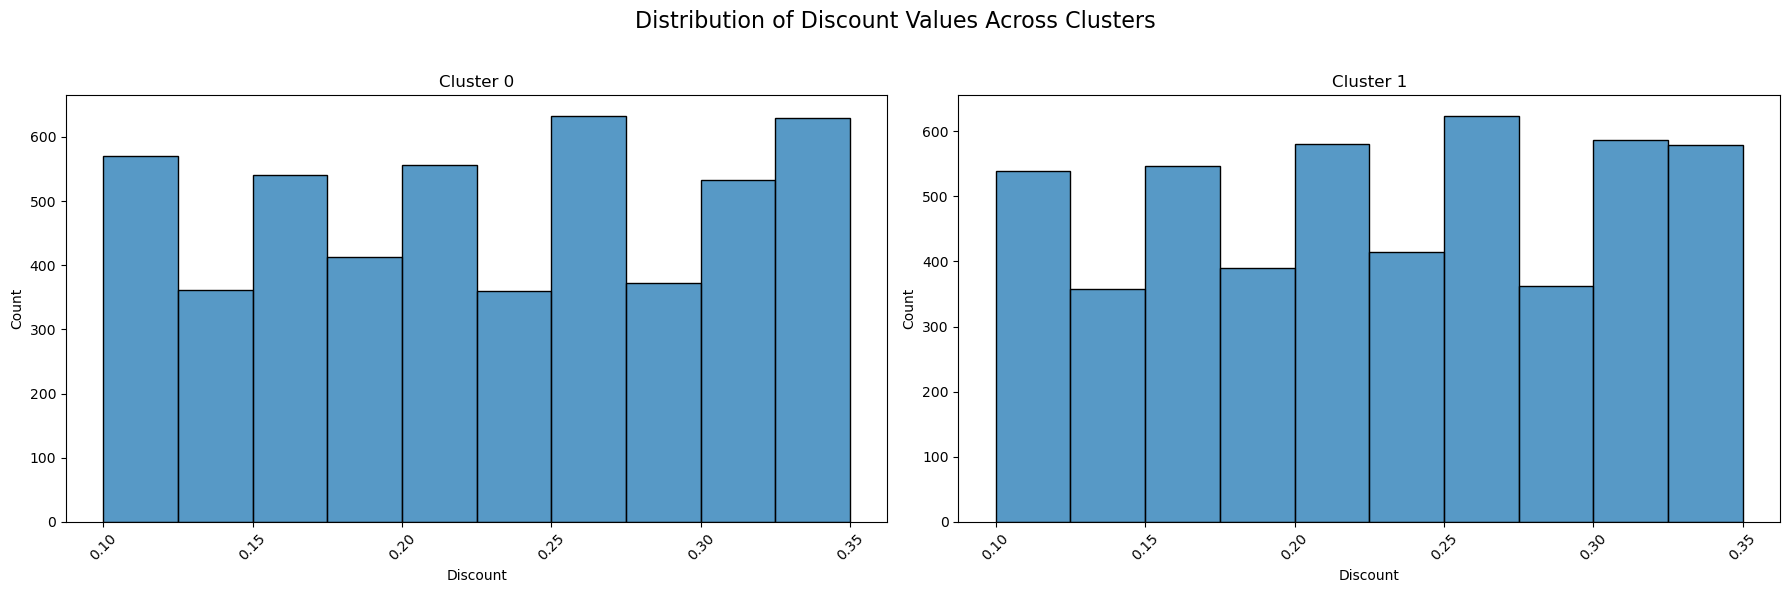

In [141]:
plt.figure(figsize=(18, 6))

num_clusters = df_new['cluster'].nunique()

for i in range(num_clusters):
    plt.subplot(1, num_clusters, i + 1)
    cluster_data = df_new[df_new['cluster'] == i]
    sns.histplot(cluster_data['Discount'], bins=10, kde=False)
    plt.title(f'Cluster {i}')
    plt.xlabel('Discount')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.suptitle('Distribution of Discount Values Across Clusters', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [143]:
Sub_Category_cluster = pd.crosstab(index = df_new['cluster'], columns = df_new['Sub Category' ])
Sub_Category_cluster.T

cluster,0,1
Sub Category,,
0,177,174
1,226,230
2,258,241
3,217,233
4,182,164
5,256,241
6,267,250
7,159,183
8,226,224
